In [13]:
%config IPCompleter.greedy=True

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
dataset = pd.read_csv("../data/Position_Salaries.csv")
print(dataset)

             Position  Level   Salary
0    Business Analyst    1.0    45000
1   Junior Consultant    2.0    50000
2   Junior Consultant    2.5    10000
3   Senior Consultant    3.0    60000
4             Manager    4.0    80000
5     Country Manager    5.0   110000
6      Region Manager    6.0   150000
7             Partner    7.0   200000
8      Senior Partner    8.0   300000
9             C-level    9.0   500000
10                CEO   10.0  1000000


In [16]:
X = dataset.iloc[:, 1].values
X = X.reshape(-1,1)
print(X)

[[ 1. ]
 [ 2. ]
 [ 2.5]
 [ 3. ]
 [ 4. ]
 [ 5. ]
 [ 6. ]
 [ 7. ]
 [ 8. ]
 [ 9. ]
 [10. ]]


In [17]:
y = dataset.iloc[:, 2].values
y = y.reshape(-1,1)
print(y)

[[  45000]
 [  50000]
 [  10000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [18]:
from sklearn.preprocessing import StandardScaler
norm_x = StandardScaler()
X = norm_x.fit_transform(X)

norm_y = StandardScaler()
y = norm_y.fit_transform(y)

In [19]:
print(X)

[[-1.47230064]
 [-1.12401447]
 [-0.94987138]
 [-0.77572829]
 [-0.42744212]
 [-0.07915595]
 [ 0.26913022]
 [ 0.6174164 ]
 [ 0.96570257]
 [ 1.31398874]
 [ 1.66227492]]


In [20]:
print(y)

[[-0.6539759 ]
 [-0.63608103]
 [-0.77923994]
 [-0.60029131]
 [-0.52871186]
 [-0.42134268]
 [-0.27818378]
 [-0.09923515]
 [ 0.25866211]
 [ 0.97445662]
 [ 2.76394291]]


In [21]:
from sklearn.svm import SVR
svr_regressor = SVR()
print(y.ravel())
svr_regressor.fit(X, y.ravel())


[-0.6539759  -0.63608103 -0.77923994 -0.60029131 -0.52871186 -0.42134268
 -0.27818378 -0.09923515  0.25866211  0.97445662  2.76394291]


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
val = svr_regressor.predict(norm_x.transform([[6.5]]))
val = val.reshape(-1,1)
norm_y.inverse_transform(val)

array([[180491.07682877]])

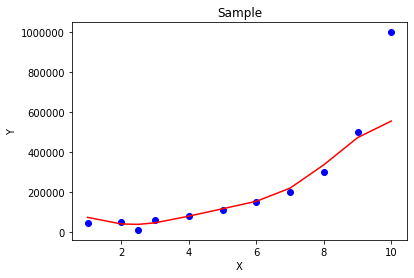

In [23]:
y_pred_poly = norm_y.inverse_transform(svr_regressor.predict(X))
plt.scatter(norm_x.inverse_transform(X), norm_y.inverse_transform(y), color = "blue")
plt.plot(norm_x.inverse_transform(X), y_pred_poly, color="red")
plt.title("Sample")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()